In [29]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3
import numpy as np
from numpy import random
from datetime import datetime
from math import nan
from sklearn.cluster import KMeans
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [3]:
matches = pd.read_csv('all_match_df.csv')

In [4]:
matches.shape

(21374, 32)

In [5]:
matches.head()

,id,league_id,date,match_api_id,home_team_goal,away_team_goal,home_overall_rating,away_overall_rating,home_crossing,away_crossing,...,home_sprint_speed,away_sprint_speed,home_agility,away_agility,home_vision,away_vision,home_standing_tackle,away_standing_tackle,home_sliding_tackle,away_sliding_tackle
0,146,1,2009,493017,2,1,61.818182,66.045455,49.863636,55.318182,...,63.454545,68.454545,60.200000,65.363636,61.200000,60.818182,48.272727,47.545455,53.100000,49.272727
1,154,1,2009,493025,1,3,66.136364,68.818182,57.181818,58.318182,...,68.181818,70.227273,65.272727,63.818182,68.181818,67.545455,49.000000,49.772727,49.818182,46.909091
2,156,1,2009,493027,2,0,70.954545,63.545455,58.818182,52.090909,...,68.909091,66.272727,63.727273,64.363636,68.636364,66.000000,58.636364,49.772727,57.090909,51.000000
3,163,1,2009,493034,2,1,62.181818,70.954545,49.409091,56.818182,...,64.136364,69.727273,59.454545,63.454545,61.727273,64.545455,47.954545,58.454545,53.454545,56.727273
4,169,1,2009,493040,0,0,64.136364,61.909091,53.727273,48.454545,...,66.681818,63.545455,65.454545,66.250000,66.181818,61.750000,50.409091,47.681818,51.818182,49.750000


In [6]:
matches['result'] = np.where(matches['home_team_goal']>matches['away_team_goal'],'win', 
                             np.where(matches['home_team_goal'] == matches['away_team_goal'],'tie','lose'))

In [7]:
new_columns = ['match_api_id', 'result','home_overall_rating','home_crossing','home_finishing','home_long_passing','home_ball_control',
                'home_volleys','home_dribbling','home_acceleration', 'home_sprint_speed','home_agility','home_vision', 
                'home_standing_tackle','home_sliding_tackle','away_overall_rating', 'away_crossing',  'away_finishing','away_long_passing', 
                'away_ball_control',  'away_volleys', 'away_dribbling', 'away_acceleration','away_sprint_speed', 'away_agility', 'away_vision', 
                'away_standing_tackle',  'away_sliding_tackle']

In [8]:
matches_new = matches.reindex(columns = new_columns)

In [9]:
matches_new.head()

,match_api_id,result,home_overall_rating,home_crossing,home_finishing,home_long_passing,home_ball_control,home_volleys,home_dribbling,home_acceleration,...,away_long_passing,away_ball_control,away_volleys,away_dribbling,away_acceleration,away_sprint_speed,away_agility,away_vision,away_standing_tackle,away_sliding_tackle
0,493017,win,61.818182,49.863636,48.090909,53.636364,57.500000,44.100000,52.090909,62.181818,...,58.909091,62.636364,53.727273,57.136364,69.181818,68.454545,65.363636,60.818182,47.545455,49.272727
1,493025,lose,66.136364,57.181818,55.954545,61.590909,63.772727,54.363636,58.909091,65.500000,...,62.500000,63.500000,54.818182,59.181818,63.954545,70.227273,63.818182,67.545455,49.772727,46.909091
2,493027,win,70.954545,58.818182,51.500000,64.409091,67.181818,50.363636,57.772727,65.409091,...,56.227273,58.090909,47.181818,49.500000,63.863636,66.272727,64.363636,66.000000,49.772727,51.000000
3,493034,win,62.181818,49.409091,49.500000,52.545455,57.227273,45.000000,51.000000,62.500000,...,62.590909,66.181818,50.090909,57.681818,68.181818,69.727273,63.454545,64.545455,58.454545,56.727273
4,493040,tie,64.136364,53.727273,44.818182,57.454545,58.500000,47.545455,51.136364,64.090909,...,54.500000,55.000000,53.750000,49.909091,61.454545,63.545455,66.250000,61.750000,47.681818,49.750000


In [10]:
matches_new.isna().sum()

match_api_id            0
result                  0
home_overall_rating     0
home_crossing           0
home_finishing          0
home_long_passing       0
home_ball_control       0
home_volleys            0
home_dribbling          0
home_acceleration       0
home_sprint_speed       0
home_agility            0
home_vision             0
home_standing_tackle    0
home_sliding_tackle     0
away_overall_rating     0
away_crossing           0
away_finishing          0
away_long_passing       0
away_ball_control       0
away_volleys            0
away_dribbling          0
away_acceleration       0
away_sprint_speed       0
away_agility            0
away_vision             0
away_standing_tackle    0
away_sliding_tackle     0
dtype: int64

In [11]:
matches_EDA = matches_new.loc[:, ['result','home_overall_rating','home_crossing','home_finishing','home_long_passing','home_ball_control',
                'home_volleys','home_dribbling','home_acceleration', 'home_sprint_speed','home_agility','home_vision', 
                'home_standing_tackle','home_sliding_tackle']]

In [12]:
matches_EDA.head()

,result,home_overall_rating,home_crossing,home_finishing,home_long_passing,home_ball_control,home_volleys,home_dribbling,home_acceleration,home_sprint_speed,home_agility,home_vision,home_standing_tackle,home_sliding_tackle
0,win,61.818182,49.863636,48.090909,53.636364,57.500000,44.100000,52.090909,62.181818,63.454545,60.200000,61.200000,48.272727,53.100000
1,lose,66.136364,57.181818,55.954545,61.590909,63.772727,54.363636,58.909091,65.500000,68.181818,65.272727,68.181818,49.000000,49.818182
2,win,70.954545,58.818182,51.500000,64.409091,67.181818,50.363636,57.772727,65.409091,68.909091,63.727273,68.636364,58.636364,57.090909
3,win,62.181818,49.409091,49.500000,52.545455,57.227273,45.000000,51.000000,62.500000,64.136364,59.454545,61.727273,47.954545,53.454545
4,tie,64.136364,53.727273,44.818182,57.454545,58.500000,47.545455,51.136364,64.090909,66.681818,65.454545,66.181818,50.409091,51.818182


In [36]:
matches_EDA.result = matches_EDA.result.map({'win':0, 'tie':1, 'lose':2})

In [37]:
matches_EDA.head()

,result,home_overall_rating,home_crossing,home_finishing,home_long_passing,home_ball_control,home_volleys,home_dribbling,home_acceleration,home_sprint_speed,home_agility,home_vision,home_standing_tackle,home_sliding_tackle
0,0,61.818182,49.863636,48.090909,53.636364,57.500000,44.100000,52.090909,62.181818,63.454545,60.200000,61.200000,48.272727,53.100000
1,2,66.136364,57.181818,55.954545,61.590909,63.772727,54.363636,58.909091,65.500000,68.181818,65.272727,68.181818,49.000000,49.818182
2,0,70.954545,58.818182,51.500000,64.409091,67.181818,50.363636,57.772727,65.409091,68.909091,63.727273,68.636364,58.636364,57.090909
3,0,62.181818,49.409091,49.500000,52.545455,57.227273,45.000000,51.000000,62.500000,64.136364,59.454545,61.727273,47.954545,53.454545
4,1,64.136364,53.727273,44.818182,57.454545,58.500000,47.545455,51.136364,64.090909,66.681818,65.454545,66.181818,50.409091,51.818182


<AxesSubplot:>

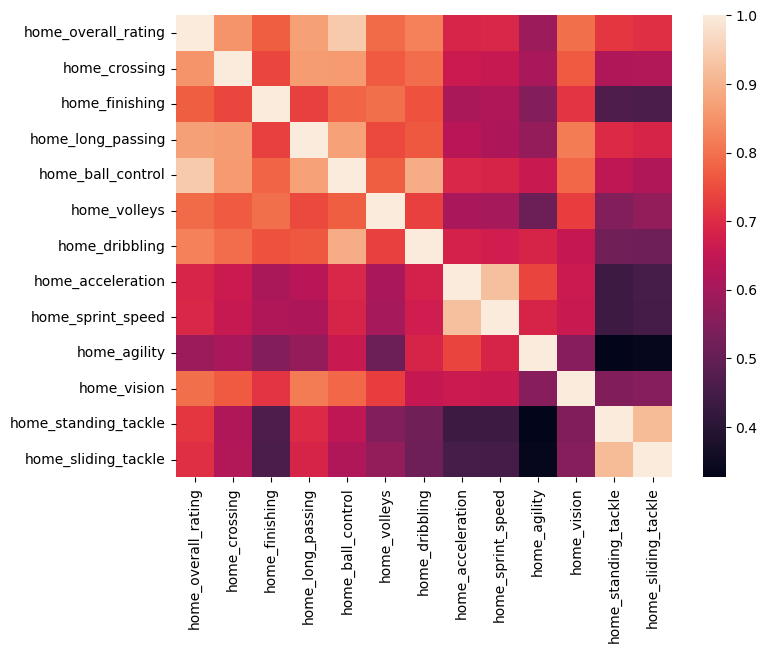

In [13]:
plt.subplots(figsize=(8,6))
sns.heatmap(matches_EDA.corr())

- The heatmap shows that 'ball control' has a noticable correlation with 'overall_rating'.

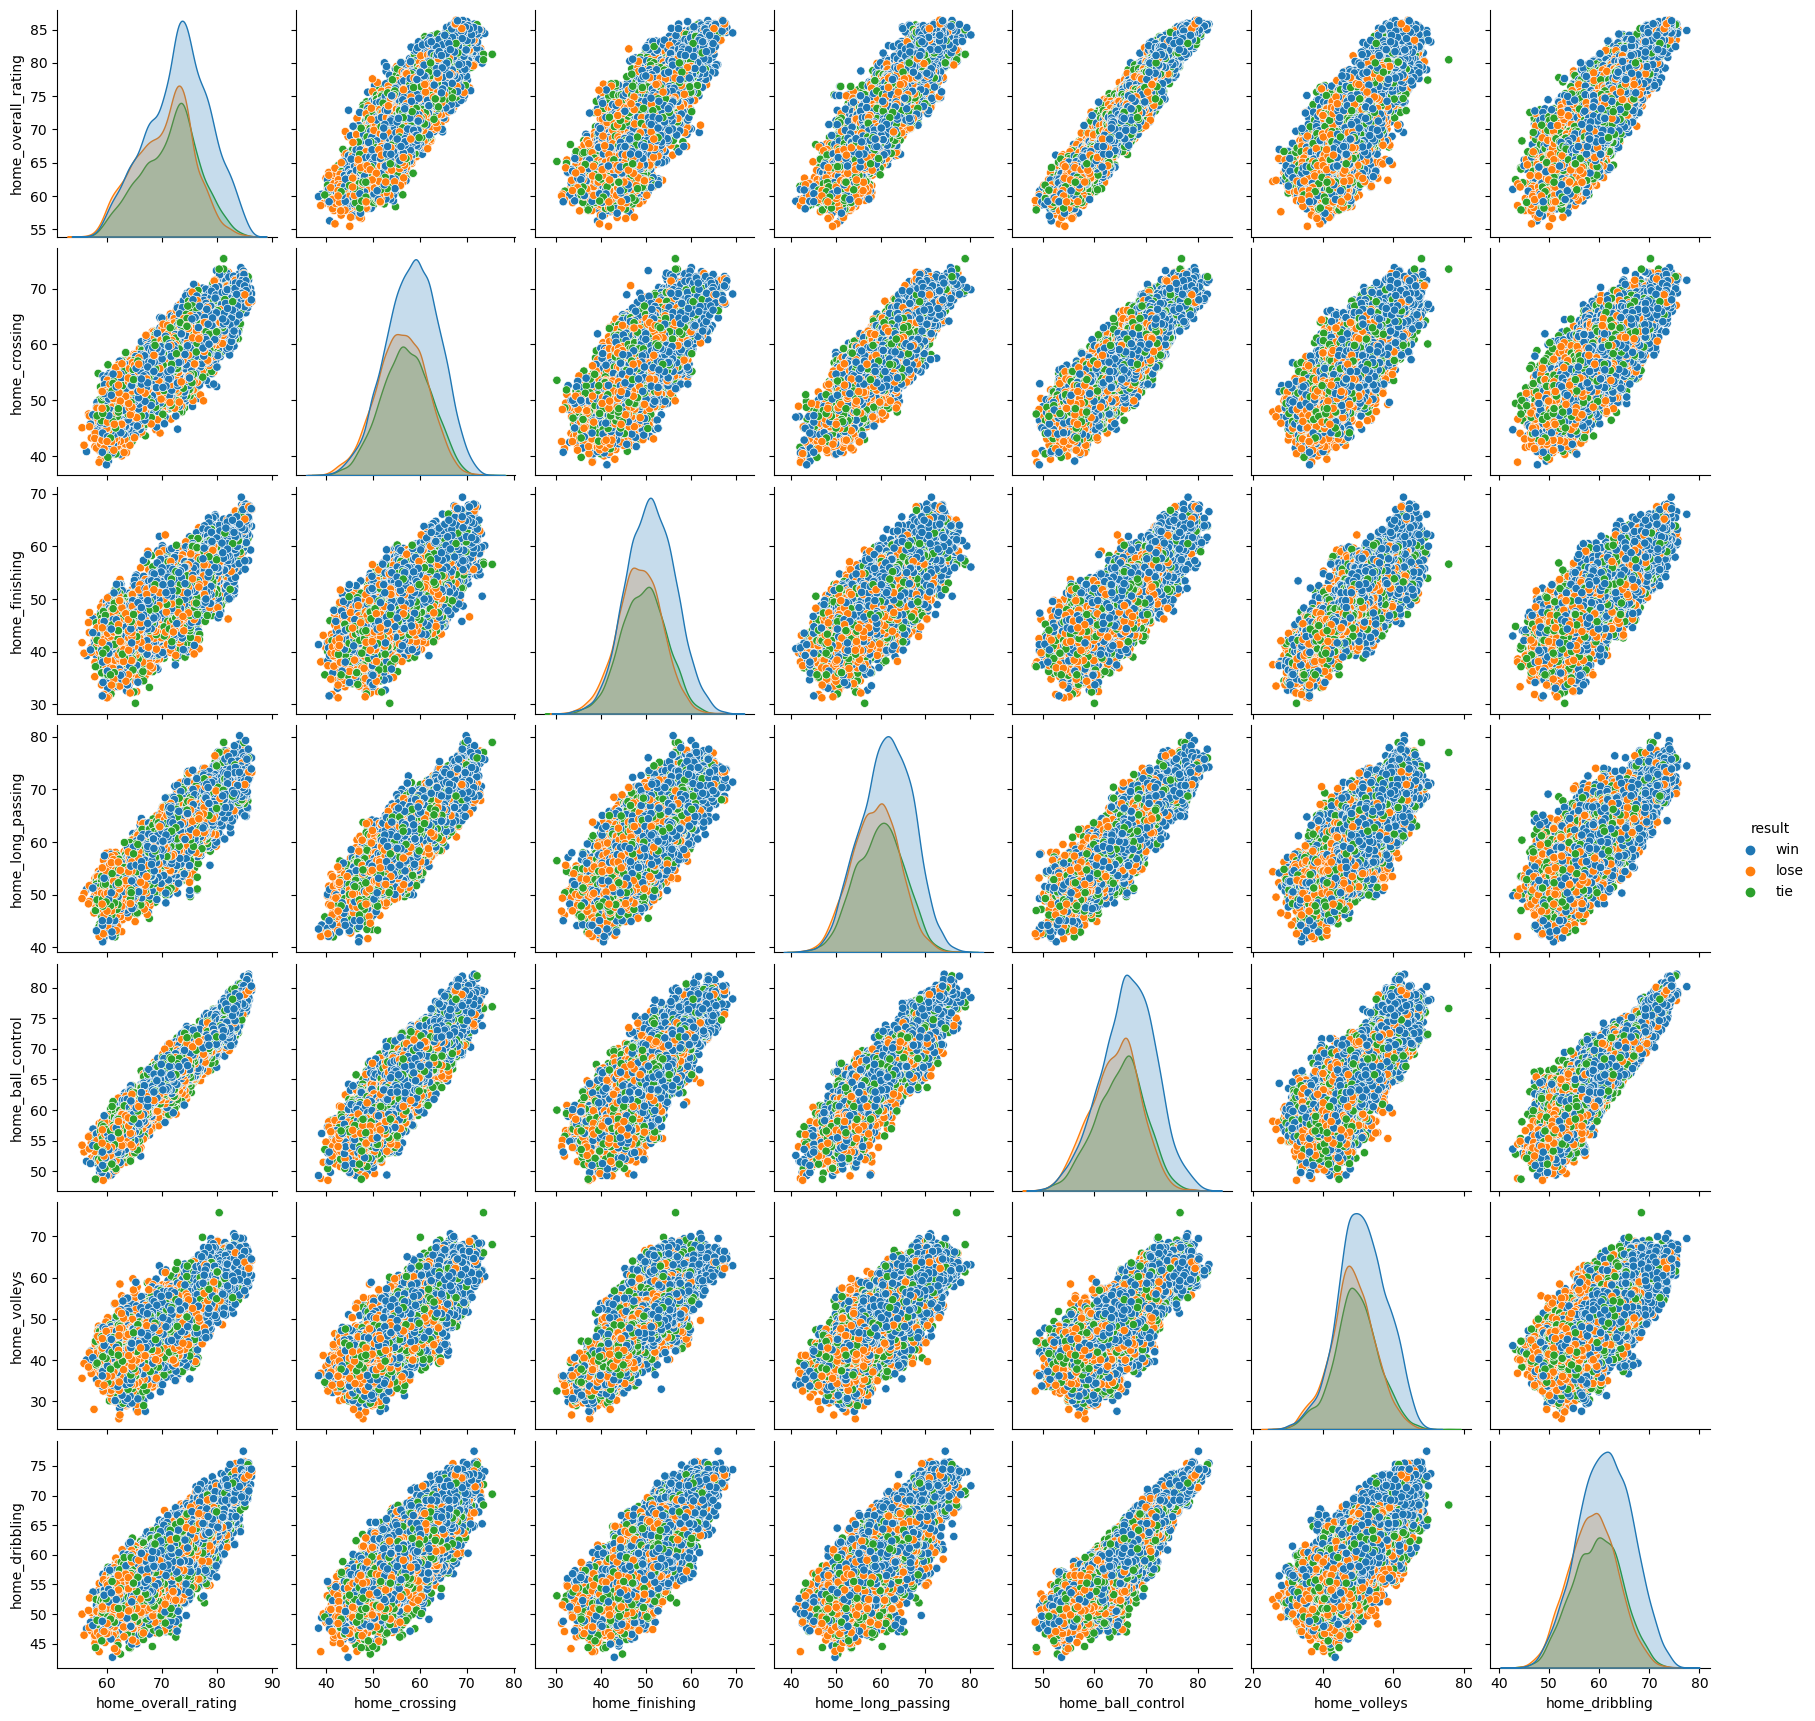

In [14]:
sns.pairplot(matches_EDA.iloc[:,:8], hue='result')

- The pairplot shows that most of the features have a positive correlation between each other.

In [25]:
def get_box(df, attr, figsize = (10,4)):

    plt.subplots(figsize=figsize)
    sns.boxplot(x='league_id', y= attr, data=df, palette = 'crest')
    plt.xticks(rotation='vertical')
    plt.ylabel(attr)
    plt.xlabel('Country')

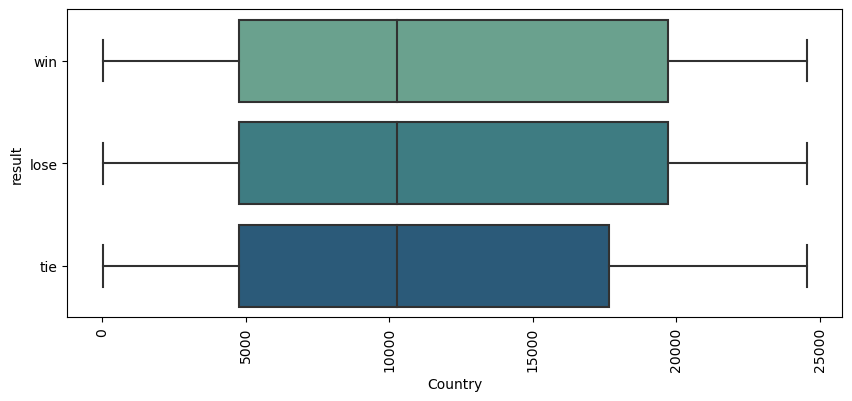

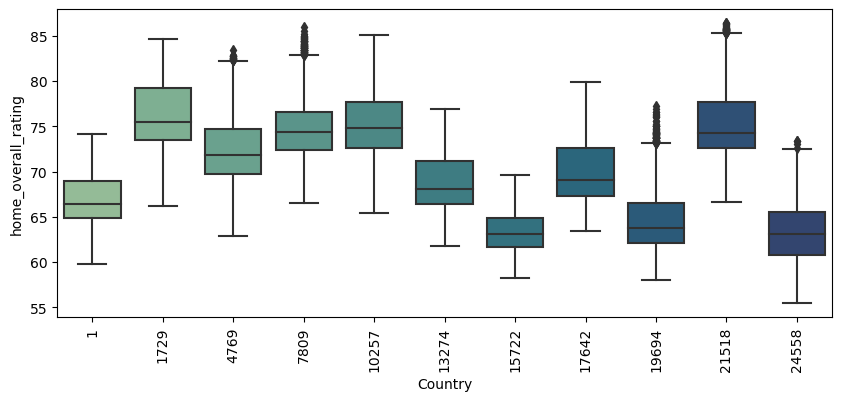

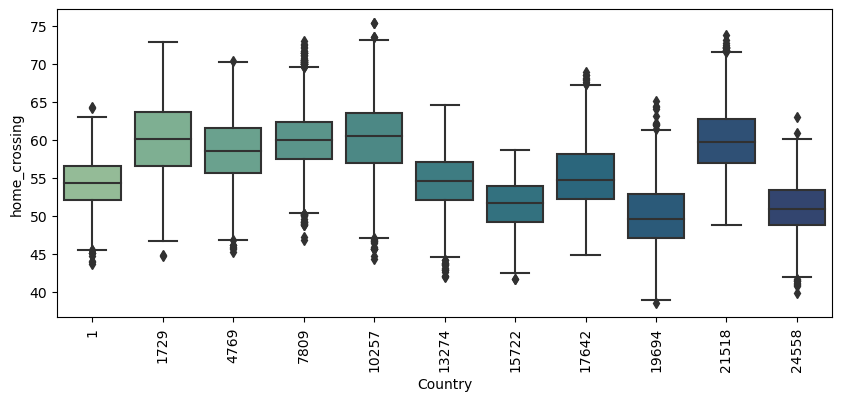

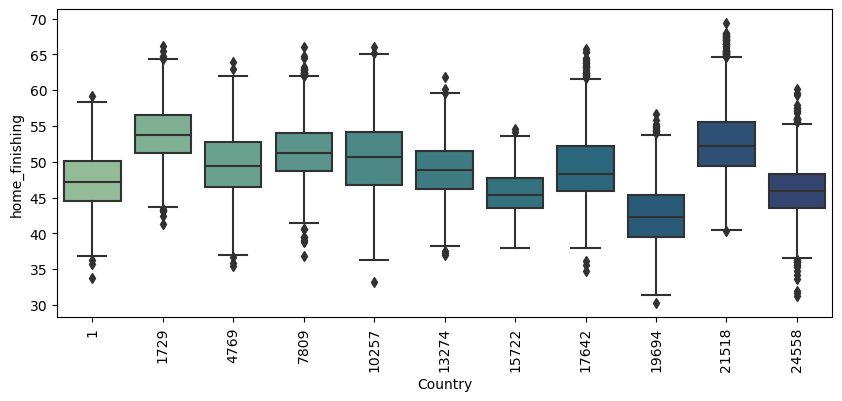

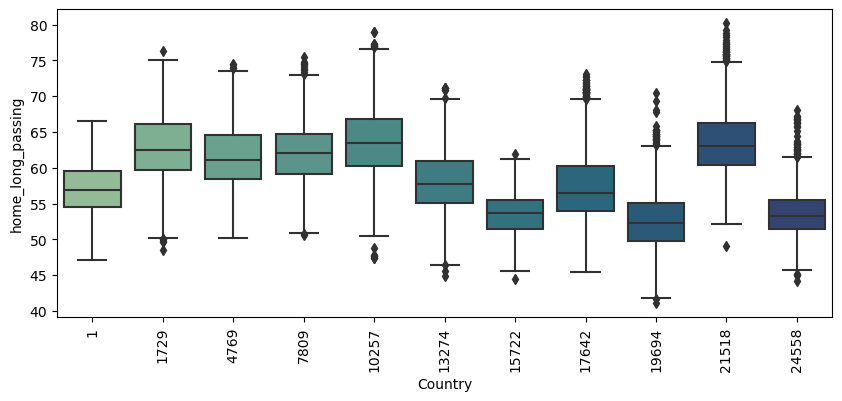

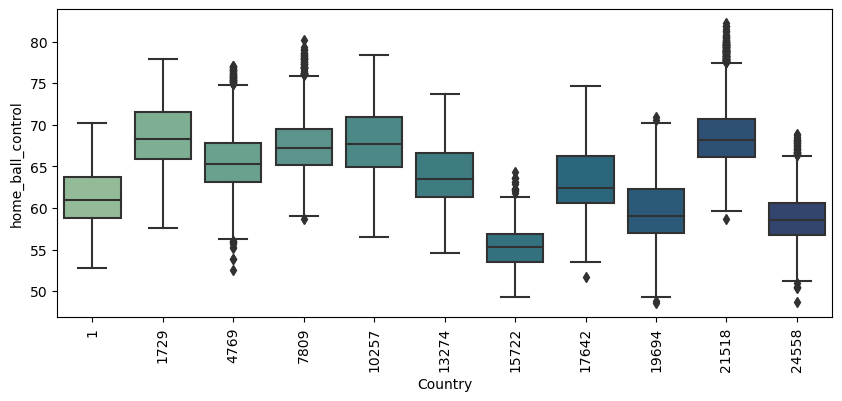

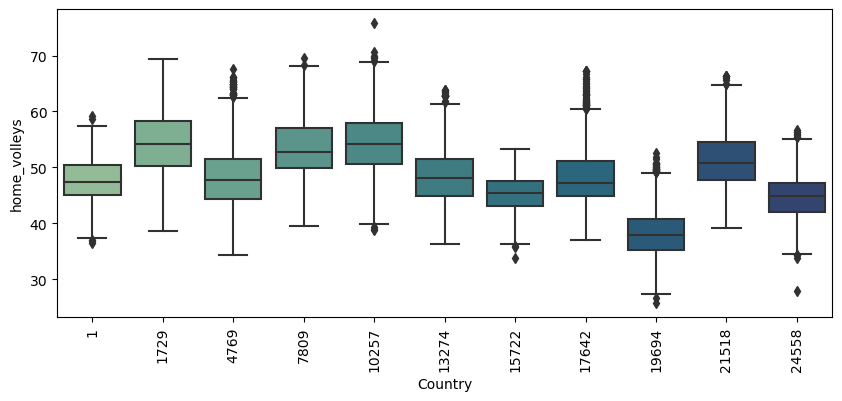

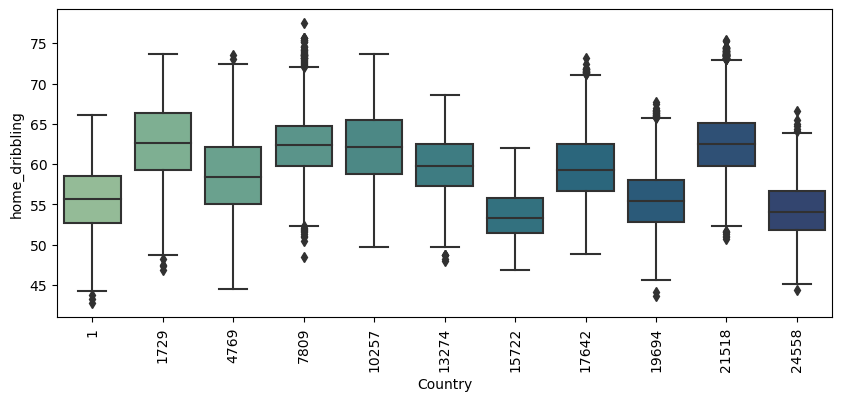

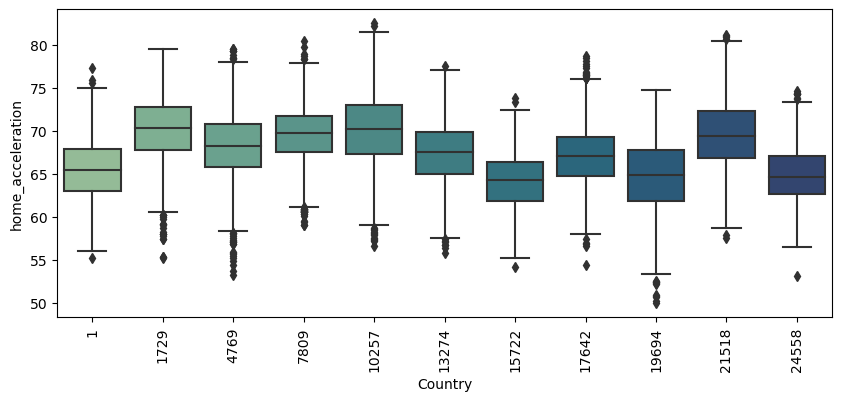

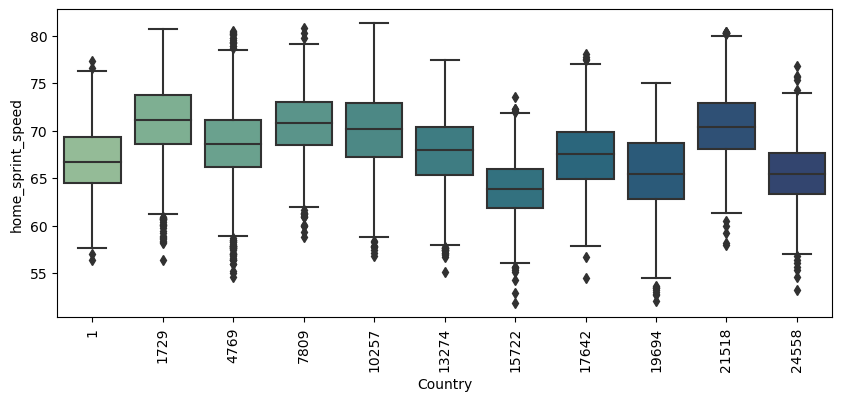

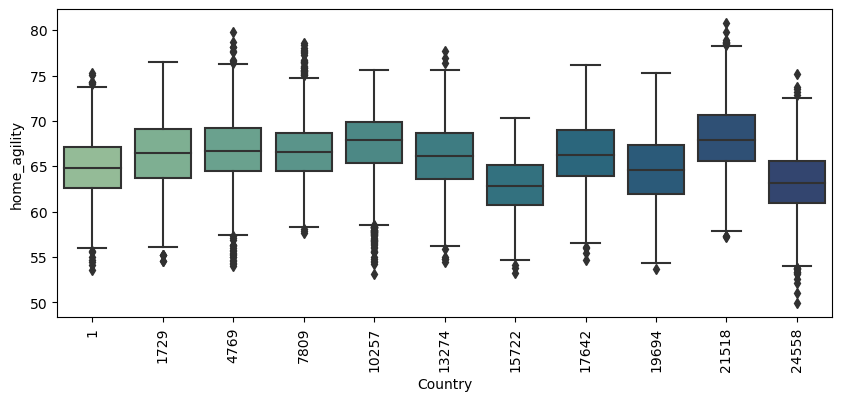

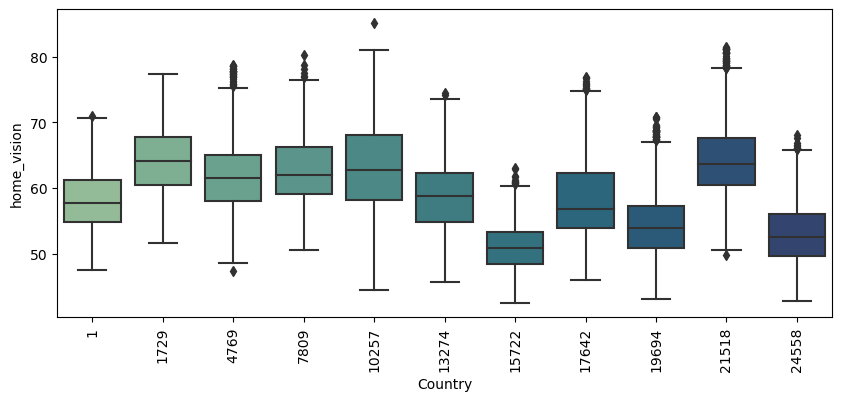

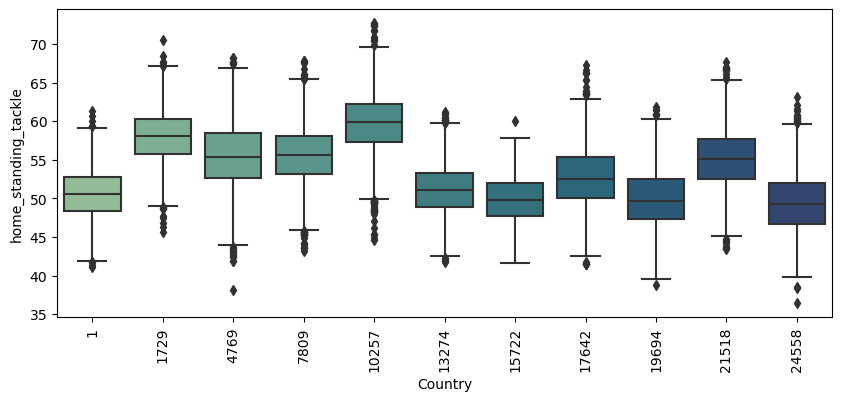

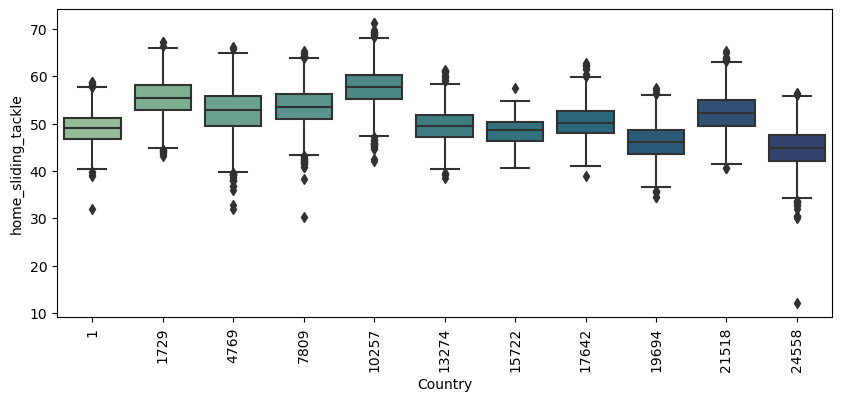

In [28]:
for attr in matches_EDA.columns:
    get_box(matches, attr)

- There is no noticable difference between the distribution of 'win' and 'lose'.
- There are noticable difference distribution on all tested attributes between different leagues.
- There is very few concering outliers.

In [38]:
# Use PCA to visualize high dimensional data

features_scale = scale(matches_EDA.iloc[:,1:])

In [40]:
features_col = matches_EDA.iloc[:,1:].columns

In [42]:
features_scale_df = pd.DataFrame(features_scale, columns = features_col)
features_scale_df.head()

,home_overall_rating,home_crossing,home_finishing,home_long_passing,home_ball_control,home_volleys,home_dribbling,home_acceleration,home_sprint_speed,home_agility,home_vision,home_standing_tackle,home_sliding_tackle
0,-1.820340,-1.358562,-0.350753,-1.168827,-1.534743,-0.864552,-1.522850,-1.434227,-1.285952,-1.592309,0.056990,-1.272659,0.184725
1,-1.040449,-0.030155,1.131230,0.248667,-0.313032,0.671600,-0.214252,-0.652460,-0.159460,-0.282604,1.117287,-1.128176,-0.427077
2,-0.170255,0.266880,0.291725,0.750864,0.350942,0.072923,-0.432352,-0.673878,0.013846,-0.681618,1.186317,0.786217,0.928718
3,-1.754665,-1.441071,-0.085196,-1.363226,-1.587861,-0.729850,-1.732225,-1.359263,-1.123477,-1.784774,0.137064,-1.335870,0.250820
4,-1.401662,-0.657229,-0.967532,-0.488430,-1.339978,-0.348873,-1.706054,-0.984443,-0.516905,-0.235662,0.813556,-0.848241,-0.054234


In [43]:
features_scale_df.mean()

home_overall_rating    -2.933308e-16
home_crossing          -9.955414e-16
home_finishing         -8.318622e-17
home_long_passing      -6.602435e-17
home_ball_control       1.323339e-15
home_volleys            8.458036e-16
home_dribbling          9.617500e-16
home_acceleration       1.478120e-15
home_sprint_speed      -1.825297e-15
home_agility           -1.765615e-15
home_vision            -7.373914e-16
home_standing_tackle    1.341212e-15
home_sliding_tackle     5.345993e-16
dtype: float64

In [44]:
features_scale_df.std()

home_overall_rating     1.000023
home_crossing           1.000023
home_finishing          1.000023
home_long_passing       1.000023
home_ball_control       1.000023
home_volleys            1.000023
home_dribbling          1.000023
home_acceleration       1.000023
home_sprint_speed       1.000023
home_agility            1.000023
home_vision             1.000023
home_standing_tackle    1.000023
home_sliding_tackle     1.000023
dtype: float64

In [49]:
feature_pca = PCA().fit(features_scale)

In [50]:
feature_pca.explained_variance_ratio_

array([0.70480654, 0.09717916, 0.05591911, 0.03348038, 0.02660154,
       0.02090818, 0.01553912, 0.01350596, 0.00896687, 0.00855083,
       0.00613559, 0.00544175, 0.00296496])

Text(0.5, 1.0, 'Cumulative variance ratio explained by PCA components')

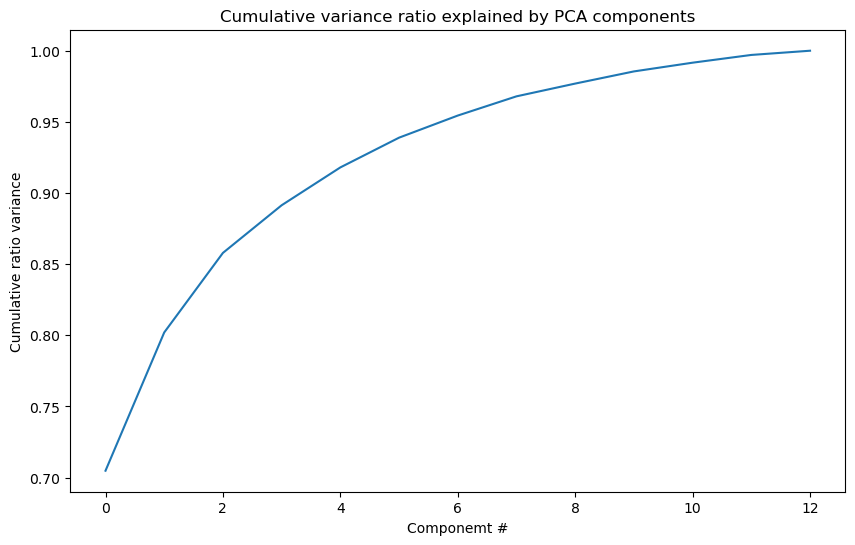

In [52]:
plt.subplots(figsize=(10, 6))
plt.plot(feature_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Componemt #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components')

The first two components seem to account for over 87% of the variance, and the first four for over 92%.
Therefore, during feature engineering, it is acceptable to reduce the number of